In [68]:
import numpy as np
from matplotlib import pyplot as plt
import math
% matplotlib inline

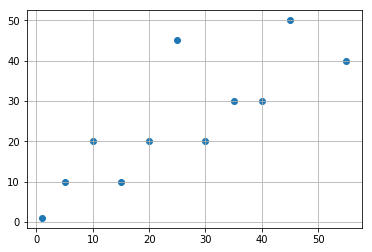

In [197]:
# Ввод тестовых данных

Xs = [1, 5, 10, 45, 40, 30, 20, 35, 25, 15, 55]
Ys = [1, 10, 20, 50, 30, 20, 20, 30, 45, 10, 40]

plt.scatter(Xs, Ys)
plt.grid()
plt.show()

In [198]:
# Частные производные

def dx0(w0, w1):
    s0 = 0
    for i in range(len(Xs)):
        s0 += w1 * Xs[i] + w0 - Ys[i]
    return (2 * s0 / len(Xs))

def dx1(w0, w1):
    s0 = 0
    for i in range(len(Xs)):
        s0 += Xs[i] * (w1 * Xs[i] + w0 - Ys[i])
    return (2 * s0 / len(Xs))

# Градиентный спуск
    
def grad_descent(epsilon = 0.001):
    w0 = 0
    w1 = 0
    eta = 0.001
    err = 0
    for i in range(len(Xs)):
        err += w1 * Xs[i] + w0 - Ys[i]
    error = [err / len(Xs)]
    while math.fabs(error[-1]) > epsilon:
        w0_new = w0 - eta * (dx0(w0, w1))
        w1_new = w1 - eta * (dx1(w0, w1))
        w0 = w0_new
        w1 = w1_new
        err = 0
        for i in range(len(Xs)):
            err += w1 * Xs[i] + w0 - Ys[i]
        error.append(err / len(Xs))
    return w0, w1, error

Количество итераций: 16798
Коэффициенты: w0 = 6.396
w1 = 0.732


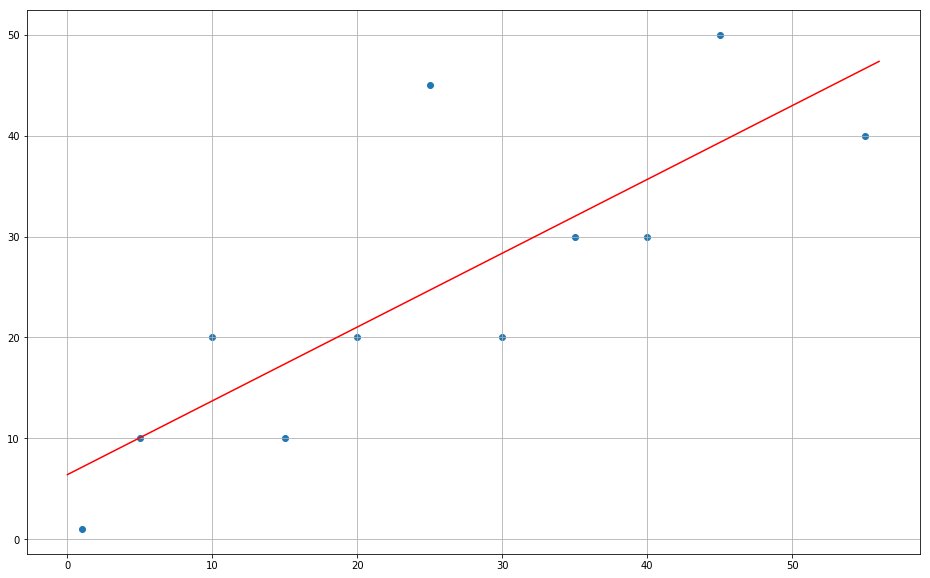

In [199]:
# Расчет и визуализация модели

w0, w1, error_list = grad_descent(0.0001)
    
print("Количество итераций:", len(error_list))
print("Коэффициенты: w0 =", round(w0, 3))
print("w1 =", round(w1, 3))
fig = plt.figure(figsize = (16, 10))
plt.scatter(Xs, Ys)
plt.grid()
X_range = np.linspace(min(Xs) - 1, max(Xs) + 1, 3)
Y_range = []
for x in X_range:
    Y_range.append(w1 * x + w0)
plt.plot(X_range, Y_range, color = 'r')
plt.show()